Install the necessary libraries

In [1]:
!!pip install beautifulsoup4
!!pip install tqdm
!!pip install pandas
!!pip install install matplotlib
!!pip install scipy
!!pip install seaborn
!!pip install requests
!!pip install numpy

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import requests
import re
from tqdm import tqdm
from bs4 import BeautifulSoup
from matplotlib.pyplot import figure
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import statistics


Enter the brand and model for each car (list of brands and models can be found in [table](BrandsAndModels.md))

In [2]:
# first car's brand
car_brand1 = 'volkswagen'
# first car's model
car_model1 = 'caddy'

# second car's brand
car_brand2 = 'volkswagen'
# second car's model
car_model2 = 'passat-cc'


Run the whole project

In [3]:
def extract_price_and_title(car):
    """ This function pulls the necessary information about cars """
    car_title = car.find("span", class_="car-title").text
    car_price_dirty = car.find("div", class_="car_item__price_block text-red").find("span", class_="price").text
    car_price = re.sub("[^0-9]", '', car_price_dirty)
    car_year = car.find("div", class_ = "car_item__icon icon_year").text
    car_power = car.find("div", class_ = "car_item__icon icon_power").text
    car_fuel = car.find("div", class_ = "car_item__icon icon_fuel").text
    car_range = car.find("div", class_ = "car_item__icon icon_range").text
    return {
        "title": car_title,
        "price": int(car_price),
        "year": car_year,
        "power": car_power,
        "fuel": car_fuel,
        "range": car_range
    }

def databrand (brand, model):
    """ This function goes through the pages of the selected brand and model on the web and extracts the necessary information """
    final = []
    url = 'https://www.autoesa.cz'
    # calculate the number of sides
    brand_all = f"{url}/{brand}/{model}?stranka=1"
    response = requests.get(brand_all).text
    soup = BeautifulSoup(response, 'html.parser')
    num_pg = 1
    pagination = soup.find("div", class_="pagination")

    if pagination is None:
        pass
    elif pagination.find("li", class_="dots dots-last") is not None:
        num_pg_str = pagination.find("li", class_="dots dots-last").text
        num_pg = int(re.sub("[^0-9]", '', num_pg_str))
    else:
        num_pg_str = soup.find("div", class_="pagination").find_all("li")[-2].text
        num_pg = int(re.sub("[^0-9]", '', num_pg_str))

    page_range = [i for i in range(1,num_pg+1)]
    for i in tqdm(page_range):
        brand_url = f"{url}/{brand}/{model}?stranka={i}"
        page_html = requests.get(brand_url).text
        soup1 = BeautifulSoup(page_html, 'html.parser')
        cars_list = soup1.find_all("a", class_="car_item")
        final += map(extract_price_and_title, cars_list)
    return final


Storage of collected data

In [4]:
def car_data (car_brand, car_model):
    """ This function saves the detected data about the car to a variable, as well as the car label """
    return databrand(brand=car_brand, model=car_model), str(car_brand) + ' ' + str(car_model)

data_auto_1, label1 = car_data(car_brand = car_brand1, car_model = car_model1)
data_auto_2, label2 = car_data(car_brand = car_brand2, car_model = car_model2)


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.26s/it]


Prepared variables for graphs

In [5]:
def lists_for_graph (data_brand):
    """ This function extracts separate lists for each parameter from the final data """
    price_lst = []
    name_lst = []
    year_lst = []
    power_lst = []
    fuel_lst = []
    range_lst = []
    for item in data_brand:
        price_lst.append(item['price'])
        name_lst.append(item['title'])
        year_lst.append(int(item['year']))
        power_lst.append(int(re.sub("[^0-9]", '', item['power'])))
        fuel_lst.append(item['fuel'])
        range_lst.append(int(re.sub("[^0-9]", '', item['range'])))
    return price_lst, name_lst, year_lst, power_lst, fuel_lst, range_lst

# first car
price_lst_1, name_lst_1, year_lst_1, power_lst_1, fuel_lst_1, range_lst_1 = lists_for_graph(data_auto_1)

# second car
price_lst_2, name_lst_2, year_lst_2, power_lst_2, fuel_lst_2, range_lst_2 = lists_for_graph(data_auto_2)


GRAPHS

Comparison chart that shows the min, max and median prices of the investigated car brands

<Figure size 800x400 with 0 Axes>

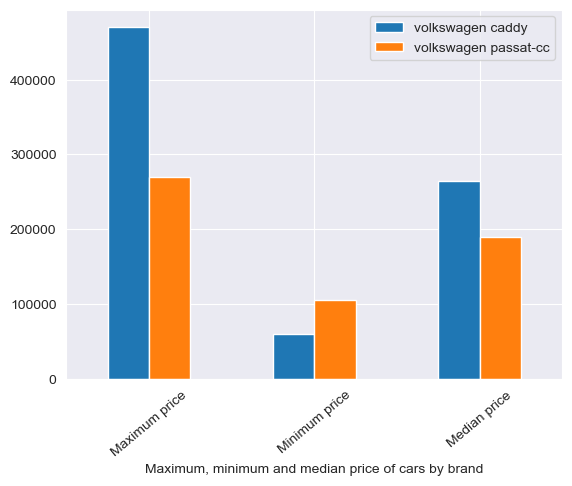

In [6]:
# finds the min, max and median prices of cars searched by brand and model
min_max_avg_label=['Maximum price', 'Minimum price', 'Median price']

def max_min_avg_data (data_brand):
    max_price = max(item['price'] for item in data_brand)
    min_price = min(item['price'] for item in data_brand)
    mdn_price = statistics.median (list (item['price'] for item in data_brand))
    min_max_avg_list = []
    min_max_avg_list.append(max_price)
    min_max_avg_list.append(min_price)
    min_max_avg_list.append (round(mdn_price))
    return min_max_avg_list

# first car
aggregated_data1 = max_min_avg_data(data_auto_1)

# second car
aggregated_data2 = max_min_avg_data(data_auto_2)

### graph drawn ###

df = pd.DataFrame(
    {
        "Maximum, minimum and median price of cars by brand": min_max_avg_label,
        label1: aggregated_data1,
        label2: aggregated_data2
    }
)

figure(num=None, figsize=(10,5), dpi=80, facecolor='w', edgecolor='r')
df.plot.bar(x='Maximum, minimum and median price of cars by brand', y = [label1, label2], rot = 40)

plt.show()


Bar graphs showing cars from the most expensive

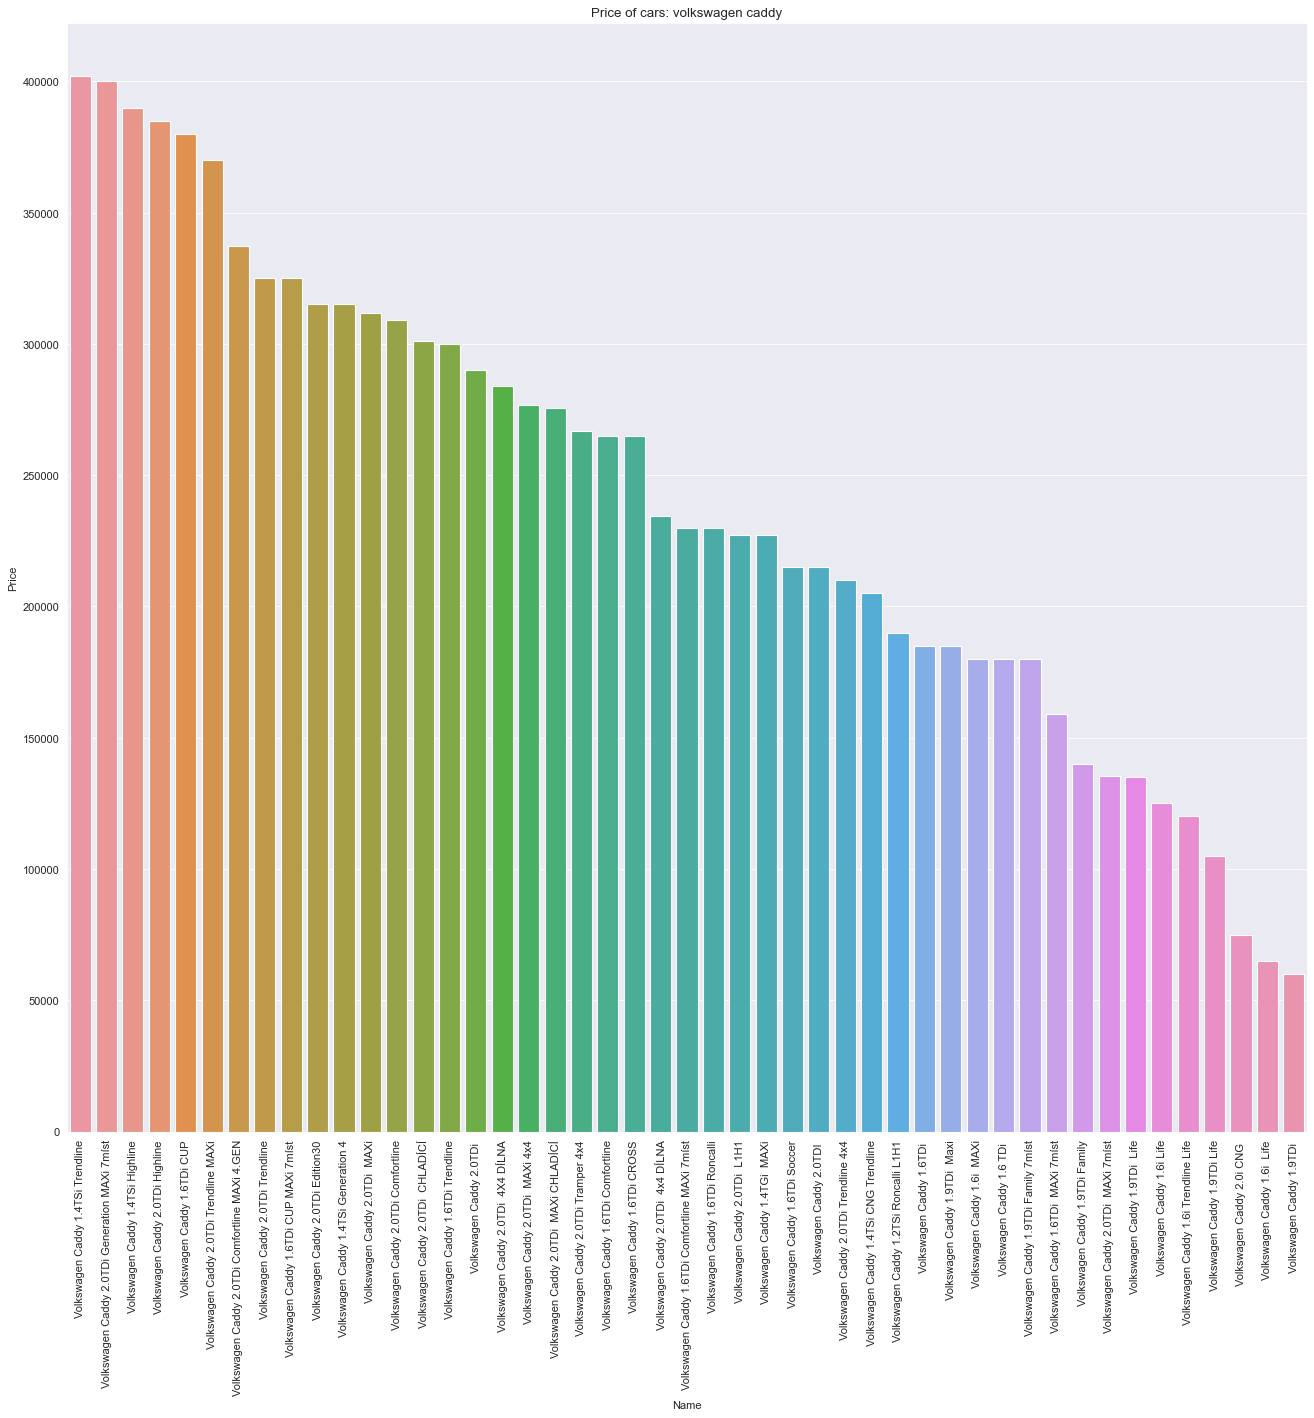

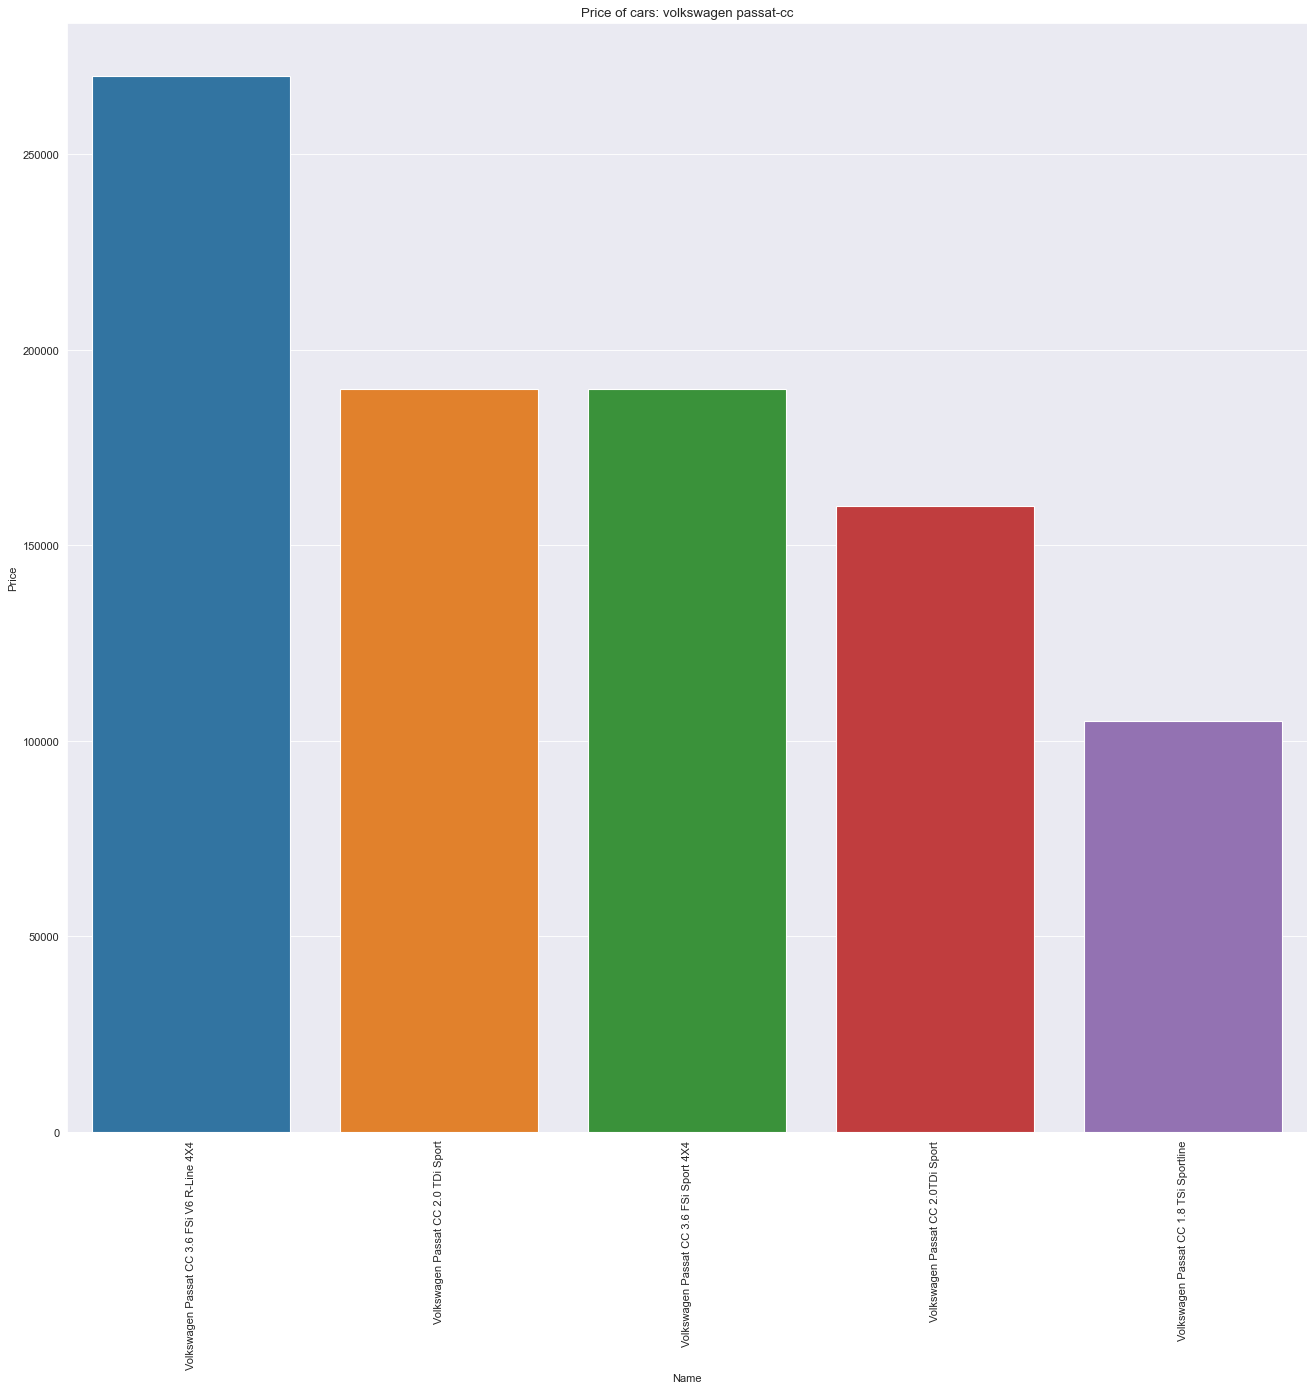

In [7]:
def barplot_graph (name, price):
    """ Creating parameters for x and y axis """
    return dict(sorted(dict(zip(name, price)).items(), key=lambda x:x[1], reverse=True))

keys_1 = list(barplot_graph(name_lst_1, price_lst_1).keys())
vals_1 = list(barplot_graph(name_lst_1, price_lst_1).values())

keys_2 = list(barplot_graph(name_lst_2, price_lst_2).keys())
vals_2 = list(barplot_graph(name_lst_2, price_lst_2).values())

def graph(keys, vals, label):
    figure(num=None, figsize=(20,18), dpi=80, facecolor='w', edgecolor='r')
    sns.barplot(x=keys, y = vals).set(title="Price of cars: " + label, xlabel='Name', ylabel='Price')
    plt.xticks(rotation = 90)
    plt.show()

### graph drawn ###

# first car
graph(keys_1, vals_1, label1)

# second car
graph(keys_2, vals_2, label2)


That scatter plot shows the relationship between the price and the year of manufacture of cars

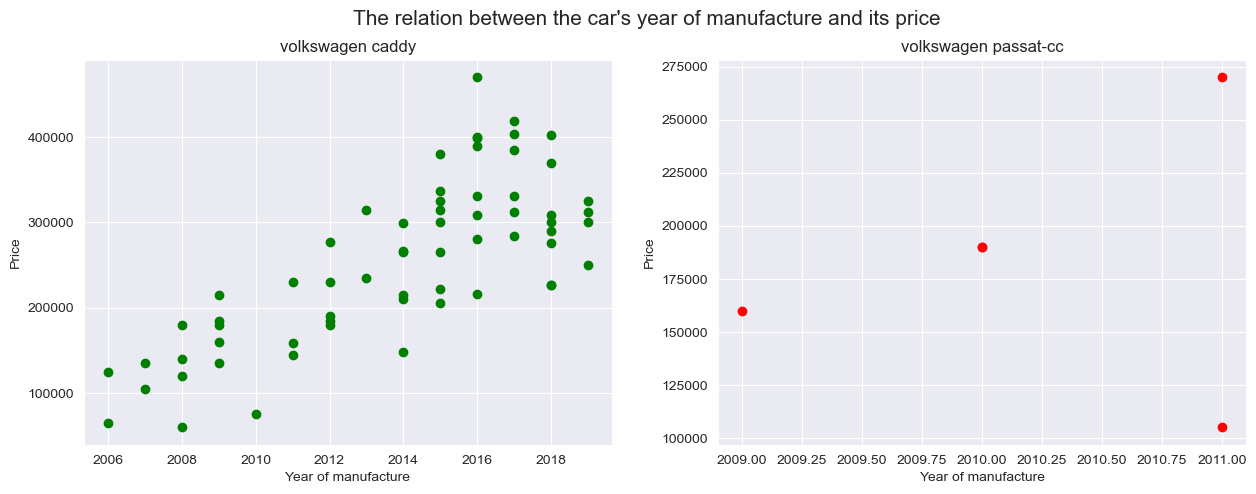

In [8]:
# first car: creating parameters for x and y axis
x_year_1 = year_lst_1
y_year_1 = price_lst_1

# second car: creating parameters for x and y axis
x_year_2 = year_lst_2
y_year_2 = price_lst_2

### graph drawn ###

figure, axis = plt.subplots(1, 2)
figure.suptitle("The relation between the car's year of manufacture and its price", fontsize=15)
figure.set_figheight(5)
figure.set_figwidth(15)

# first car
axis[0].scatter(x_year_1, y_year_1, c='g')
axis[0].set_title(label1)
axis[0].set_xlabel("Year of manufacture")
axis[0].set_ylabel("Price")

# second car
axis[1].scatter(x_year_2, y_year_2, c='r')
axis[1].set_title(label2)
axis[1].set_xlabel("Year of manufacture")
axis[1].set_ylabel("Price")

plt.show()


This Bar chart shows the % of cars with each type of fuel for each brand

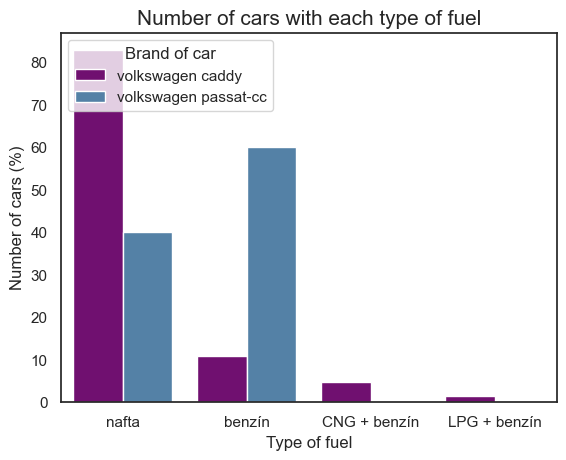

In [9]:
# creating parameters for x and y axis
def barplot_data(fuel):
    return dict(sorted({i:(fuel.count(i)/len(fuel))*100 for i in fuel}.items(), key=lambda x:x[1], reverse=True))

x_fuel_1 = list(barplot_data(fuel_lst_1).keys())
y_fuel_1 = list(barplot_data(fuel_lst_1).values())
z_fuel_1 = [label1] * len(y_fuel_1)

x_fuel_2 = list(barplot_data(fuel_lst_2).keys())
y_fuel_2 = list(barplot_data(fuel_lst_2).values())
z_fuel_2 = [label2] * len(y_fuel_2)

# creating the DataFrame for data display
df_fuel = pd.DataFrame (
    {
        'Type of fuel': x_fuel_1 + x_fuel_2,
        'Number of cars': y_fuel_1 + y_fuel_2,
        'Brand of car': z_fuel_1 + z_fuel_2
    }
)

### graph drawn ###

sns.set(style='white')
sns.barplot(x='Type of fuel', y='Number of cars', hue='Brand of car', data=df_fuel, palette=['purple', 'steelblue'])
plt.title('Number of cars with each type of fuel', fontsize=15)
plt.xlabel('Type of fuel')
plt.ylabel('Number of cars (%)')

plt.show()


This scatter plot shows the relationship between price and performance of cars

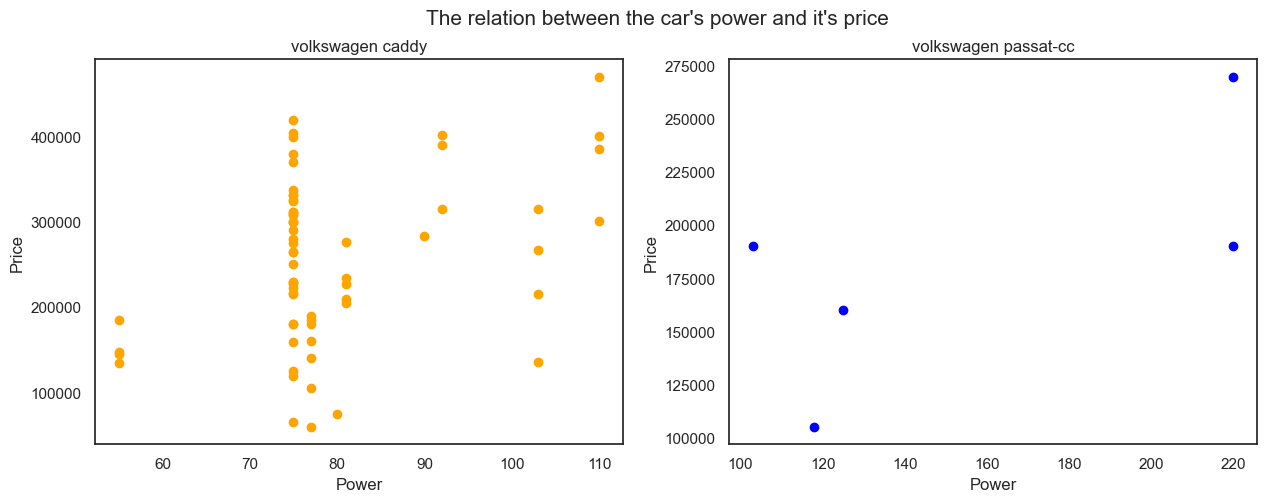

In [10]:
# first car: creating parameters for x and y axis
x_power_1 = power_lst_1
y_price_1 = price_lst_1

# second car: creating parameters for x and y axis
x_power_2 = power_lst_2
y_price_2 = price_lst_2

### graph drawn ###
figure, axis = plt.subplots(1, 2)
figure.suptitle("The relation between the car's power and it's price", fontsize=15)
figure.set_figheight(5)
figure.set_figwidth(15)

# first car
axis[0].scatter(x_power_1, y_price_1, c='orange')
axis[0].set_title(label1)
axis[0].set_xlabel("Power")
axis[0].set_ylabel("Price")

# second car
axis[1].scatter(x_power_2, y_price_2, c='blue')
axis[1].set_title(label2)
axis[1].set_xlabel("Power")
axis[1].set_ylabel("Price")

plt.show()


3D grafy, kteri ukazuji vztah cen, roku vyroby a stavu tachometru aut kayde zkoumane znacky

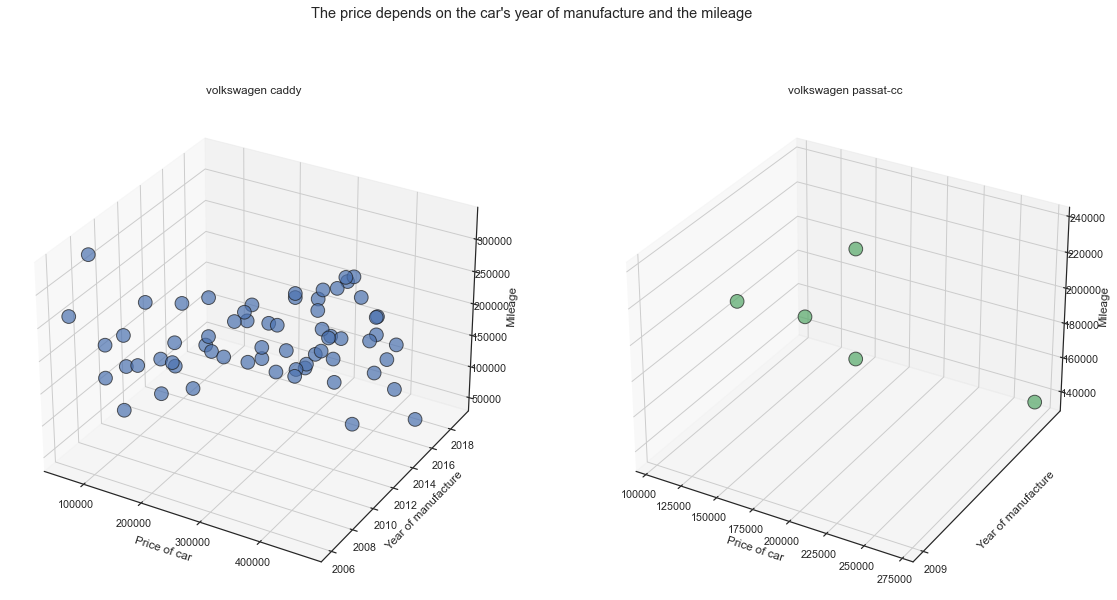

In [11]:
### graph drawn ###

fig = plt.figure(dpi=70)
ax = fig.add_subplot(1, 2, 1, projection='3d')
fig.suptitle("The price depends on the car's year of manufacture and the mileage", fontsize=15)
fig.set_figheight(10)
fig.set_figwidth(20)

# first car
ax.scatter(price_lst_1, year_lst_1, range_lst_1,
   linewidths=1, alpha=.7,
   edgecolor='k',
   s = 200, c='b')
ax.set_title(label1)
ax.set_xlabel('Price of car')
ax.set_ylabel('Year of manufacture')
ax.set_zlabel('Mileage')
ax.set_yticks(range(min(year_lst_1), max(year_lst_1), 2))

# second car
ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.scatter(price_lst_2, year_lst_2, range_lst_2,
   linewidths=1, alpha=.7,
   edgecolor='k',
   s = 200, c='g')
ax.set_title(label2)
ax.set_xlabel('Price of car')
ax.set_ylabel('Year of manufacture')
ax.set_zlabel('Mileage')
ax.set_yticks(range(min(year_lst_2), max(year_lst_2), 2))

plt.show()
